Goal of the study: Identify the variables with the highest impact on the final house price

## Exploratory Data Analysis

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.preprocessing import QuantileTransformer

import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
pd.set_option('max_columns', None)

pd.set_option('display.float_format', lambda x: '%0.4f' % x)

### Import dataset

In [2]:
df = pd.read_excel('Data/Data_MidTerm_Project_Real_State_Regression.xls')
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650,221900
1,6414100192,2014-12-09,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639,538000
2,5631500400,2015-02-25,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062,180000
3,2487200875,2014-12-09,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000,604000
4,1954400510,2015-02-18,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.5000,1530,1131,3.0000,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.3460,1530,1509,360000
21593,6600060120,2015-02-23,4,2.5000,2310,5813,2.0000,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.3620,1830,7200,400000
21594,1523300141,2014-06-23,2,0.7500,1020,1350,2.0000,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.2990,1020,2007,402101
21595,291310100,2015-01-16,3,2.5000,1600,2388,2.0000,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.0690,1410,1287,400000


### Columns type

In [3]:
df.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

### Checking NULL values

In [4]:
display(df.isnull().sum())

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

### Drop not relevant columns

In [5]:
df = df.drop(['id','lat', 'long'], axis=1)
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,2014-12-09,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2015-02-25,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,2014-12-09,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,2015-02-18,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,3,2.5000,1530,1131,3.0000,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000
21593,2015-02-23,4,2.5000,2310,5813,2.0000,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000
21594,2014-06-23,2,0.7500,1020,1350,2.0000,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101
21595,2015-01-16,3,2.5000,1600,2388,2.0000,0,0,3,8,1600,0,2004,0,98027,1410,1287,400000


### Checking Columns

In [6]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [7]:
df.loc[df['bedrooms'] == 33]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
15856,2014-06-25,33,1.7500,1620,6000,1.0000,0,0,5,7,1040,580,1947,0,98103,1330,4700,640000


In [8]:
df = df.drop(15856).reset_index(drop=True)

In [9]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,2014-12-09,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2015-02-25,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,2014-12-09,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,2015-02-18,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2014-05-21,3,2.5000,1530,1131,3.0000,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000
21592,2015-02-23,4,2.5000,2310,5813,2.0000,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000
21593,2014-06-23,2,0.7500,1020,1350,2.0000,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101
21594,2015-01-16,3,2.5000,1600,2388,2.0000,0,0,3,8,1600,0,2004,0,98027,1410,1287,400000


In [10]:
df['bathrooms'].value_counts()
#do we need to round the data?

2.5000    5377
1.0000    3851
1.7500    3047
2.2500    2047
2.0000    1930
1.5000    1445
2.7500    1185
3.0000     753
3.5000     731
3.2500     589
3.7500     155
4.0000     136
4.5000     100
4.2500      79
0.7500      71
4.7500      23
5.0000      21
5.2500      13
5.5000      10
1.2500       9
6.0000       6
0.5000       4
5.7500       4
6.7500       2
8.0000       2
6.2500       2
6.5000       2
7.5000       1
7.7500       1
Name: bathrooms, dtype: int64

In [11]:
df['floors'].value_counts()
#confirm the meaning no of floors per properties or location of flat

1.0000    10672
2.0000     8235
1.5000     1910
3.0000      611
2.5000      161
3.5000        7
Name: floors, dtype: int64

In [12]:
#df['waterfront'].np.astype= 'category'
df['waterfront'].dtypes

dtype('int64')

In [13]:
#need to clarify the meaning
df['view'].value_counts()

0    19474
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [14]:
df['condition'].value_counts()

3    14020
4     5677
5     1700
2      170
1       29
Name: condition, dtype: int64

In [15]:
df['grade'].value_counts()

7     8973
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [16]:
df['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [17]:
df['yr_renovated'].value_counts()

0       20682
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [18]:
df['zipcode'].value_counts()

98103    601
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [19]:
df['sqft_living15'].value_counts()

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
3736      1
4950      1
2728      1
4740      1
2927      1
Name: sqft_living15, Length: 777, dtype: int64

In [20]:
df['sqft_lot15'].value_counts()

5000     427
4000     356
6000     288
7200     210
4800     145
        ... 
10170      1
10573      1
11477      1
1449       1
2007       1
Name: sqft_lot15, Length: 8682, dtype: int64

In [21]:
df['price'].describe()

count     21596.0000
mean     540291.9568
std      367376.0193
min       78000.0000
25%      322000.0000
50%      450000.0000
75%      645000.0000
max     7700000.0000
Name: price, dtype: float64

Understanding the difference between sqft_living' and 'sqft_living15.  
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

In [22]:
df_size = df.filter(['sqft_living', 'sqft_above', 'sqft_lot', 'sqft_living15', 'sqft_lot15'])
df_size

,sqft_living,sqft_above,sqft_lot,sqft_living15,sqft_lot15
0,1180,1180,5650,1340,5650
1,2570,2170,7242,1690,7639
2,770,770,10000,2720,8062
3,1960,1050,5000,1360,5000
4,1680,1680,8080,1800,7503
...,...,...,...,...,...
21591,1530,1530,1131,1530,1509
21592,2310,2310,5813,1830,7200
21593,1020,1020,1350,1020,2007
21594,1600,1600,2388,1410,1287


In [23]:
df_size.describe()

,sqft_living,sqft_above,sqft_lot,sqft_living15,sqft_lot15
count,21596.0000,21596.0000,21596.0000,21596.0000,21596.0000
mean,2080.3432,1788.6315,15099.8301,1986.6507,12758.6566
std,918.1220,827.7633,41413.5494,685.2318,27275.0183
min,370.0000,370.0000,520.0000,399.0000,651.0000
25%,1430.0000,1190.0000,5040.0000,1490.0000,5100.0000
50%,1910.0000,1560.0000,7619.0000,1840.0000,7620.0000
75%,2550.0000,2210.0000,10685.5000,2360.0000,10083.0000
max,13540.0000,9410.0000,1651359.0000,6210.0000,871200.0000


## Data Cleaning

### Transform yr_built and yr_renovated

In [24]:
df["yr_renovated"] = np.where (df["yr_renovated"] != 0, 1, df["yr_renovated"])

In [25]:
df["yr_renovated"].value_counts()

0    20682
1      914
Name: yr_renovated, dtype: int64

In [26]:
df['yr_built']= list(map(lambda x: 2015-x, df['yr_built']))

In [27]:
df['yr_built']

0        60
1        64
2        82
3        50
4        28
         ..
21591     6
21592     1
21593     6
21594    11
21595     7
Name: yr_built, Length: 21596, dtype: int64

In [28]:
df.rename(columns = {'yr_built' : 'age_build'}, inplace=True)

In [29]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_build,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,60,0,98178,1340,5650,221900
1,2014-12-09,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,64,1,98125,1690,7639,538000
2,2015-02-25,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,82,0,98028,2720,8062,180000
3,2014-12-09,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,50,0,98136,1360,5000,604000
4,2015-02-18,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,28,0,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2014-05-21,3,2.5000,1530,1131,3.0000,0,0,3,8,1530,0,6,0,98103,1530,1509,360000
21592,2015-02-23,4,2.5000,2310,5813,2.0000,0,0,3,8,2310,0,1,0,98146,1830,7200,400000
21593,2014-06-23,2,0.7500,1020,1350,2.0000,0,0,3,7,1020,0,6,0,98144,1020,2007,402101
21594,2015-01-16,3,2.5000,1600,2388,2.0000,0,0,3,8,1600,0,11,0,98027,1410,1287,400000


### Changing columns type into categorical variables

In [30]:
df['waterfront'] = pd.Categorical(df['waterfront'])
df['view'] = pd.Categorical(df['view'])
df['condition'] = pd.Categorical(df['condition'])
df['grade'] = pd.Categorical(df['grade'])
df['bathrooms'] = pd.Categorical(df['bathrooms'])
df['bedrooms'] = pd.Categorical(df['bedrooms'])
df['floors'] = pd.Categorical(df['floors'])
df['yr_renovated'] = pd.Categorical(df['yr_renovated'])

In [31]:
df.dtypes

date             datetime64[ns]
bedrooms               category
bathrooms              category
sqft_living               int64
sqft_lot                  int64
floors                 category
waterfront             category
view                   category
condition              category
grade                  category
sqft_above                int64
sqft_basement             int64
age_build                 int64
yr_renovated           category
zipcode                   int64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [32]:
categorical = df.select_dtypes(include = ['category'])
categorical

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_renovated
0,3,1.0000,1.0000,0,0,3,7,0
1,3,2.2500,2.0000,0,0,3,7,1
2,2,1.0000,1.0000,0,0,3,6,0
3,4,3.0000,1.0000,0,0,5,7,0
4,3,2.0000,1.0000,0,0,3,8,0
...,...,...,...,...,...,...,...,...
21591,3,2.5000,3.0000,0,0,3,8,0
21592,4,2.5000,2.0000,0,0,3,8,0
21593,2,0.7500,2.0000,0,0,3,7,0
21594,3,2.5000,2.0000,0,0,3,8,0


### Ordinal columns

In [33]:
#categorical['age_build'].apply(lambda x: x.toordinal())

In [34]:
categorical_ord = categorical[["waterfront", "view","condition","grade",'bathrooms','bedrooms','floors']]
categories = [["0","1"], ["0", "1", "2","3","4"],["1","2","3","4","5"],
              ["1","2","3","4","5","6","7","8","9","10","11","12","13"], 
              ['0.5','0.75','1.0','1.25','1.5','1.75','2.0','2.25','2.5','2.75','3.0','3.25','3.5','3.75','4.0','4.25','4.5','4.75','5','5.25','5.5','5.75','6.0','6.25','6.5','6.75','7.0','7.5','7.75','8.0'],
             ['1','2','3','4','5','6','7','8','9','10','11'],
             ['1.0','1.5','2.0', '2.5','3.0','3.5']]

In [35]:
ordinal_encoder = OrdinalEncoder(categories=categories)
categorical_ord_encoded = pd.DataFrame(ordinal_encoder.fit_transform(categorical_ord),columns=categorical_ord.columns)

In [36]:
categorical_ord_encoded

,waterfront,view,condition,grade,bathrooms,bedrooms,floors
0,0.0000,0.0000,2.0000,6.0000,2.0000,2.0000,0.0000
1,0.0000,0.0000,2.0000,6.0000,7.0000,2.0000,2.0000
2,0.0000,0.0000,2.0000,5.0000,2.0000,1.0000,0.0000
3,0.0000,0.0000,4.0000,6.0000,10.0000,3.0000,0.0000
4,0.0000,0.0000,2.0000,7.0000,6.0000,2.0000,0.0000
...,...,...,...,...,...,...,...
21591,0.0000,0.0000,2.0000,7.0000,8.0000,2.0000,4.0000
21592,0.0000,0.0000,2.0000,7.0000,8.0000,3.0000,2.0000
21593,0.0000,0.0000,2.0000,6.0000,1.0000,1.0000,2.0000
21594,0.0000,0.0000,2.0000,7.0000,8.0000,2.0000,2.0000


In [37]:
categorical_ord_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21596 entries, 0 to 21595
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   waterfront  21596 non-null  float64
 1   view        21596 non-null  float64
 2   condition   21596 non-null  float64
 3   grade       21596 non-null  float64
 4   bathrooms   21596 non-null  float64
 5   bedrooms    21596 non-null  float64
 6   floors      21596 non-null  float64
dtypes: float64(7)
memory usage: 1.2 MB


In [38]:
categorical.drop(["waterfront", "view","condition","grade",'bathrooms','bedrooms', 'floors'],axis=1,inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [39]:
categorical

,yr_renovated
0,0
1,1
2,0
3,0
4,0
...,...
21591,0
21592,0
21593,0
21594,0


Concat ordinal and categorical

In [40]:
categorical = pd.concat([categorical_ord_encoded,categorical],axis=1)
categorical

,waterfront,view,condition,grade,bathrooms,bedrooms,floors,yr_renovated
0,0.0000,0.0000,2.0000,6.0000,2.0000,2.0000,0.0000,0
1,0.0000,0.0000,2.0000,6.0000,7.0000,2.0000,2.0000,1
2,0.0000,0.0000,2.0000,5.0000,2.0000,1.0000,0.0000,0
3,0.0000,0.0000,4.0000,6.0000,10.0000,3.0000,0.0000,0
4,0.0000,0.0000,2.0000,7.0000,6.0000,2.0000,0.0000,0
...,...,...,...,...,...,...,...,...
21591,0.0000,0.0000,2.0000,7.0000,8.0000,2.0000,4.0000,0
21592,0.0000,0.0000,2.0000,7.0000,8.0000,3.0000,2.0000,0
21593,0.0000,0.0000,2.0000,6.0000,1.0000,1.0000,2.0000,0
21594,0.0000,0.0000,2.0000,7.0000,8.0000,2.0000,2.0000,0


In [41]:
categorical.isnull().sum()

waterfront      0
view            0
condition       0
grade           0
bathrooms       0
bedrooms        0
floors          0
yr_renovated    0
dtype: int64

### Transform Data into a numerical var

In [42]:
df['date']=df['date'].apply(lambda x: x.toordinal())
df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_build,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,735519,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,60,0,98178,1340,5650,221900
1,735576,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,64,1,98125,1690,7639,538000
2,735654,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,82,0,98028,2720,8062,180000
3,735576,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,50,0,98136,1360,5000,604000
4,735647,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,28,0,98074,1800,7503,510000


### Filtering the numerical variables

In [43]:
numerical = df.select_dtypes(include = ['int64', 'float'])
numerical

,date,sqft_living,sqft_lot,sqft_above,sqft_basement,age_build,zipcode,sqft_living15,sqft_lot15,price
0,735519,1180,5650,1180,0,60,98178,1340,5650,221900
1,735576,2570,7242,2170,400,64,98125,1690,7639,538000
2,735654,770,10000,770,0,82,98028,2720,8062,180000
3,735576,1960,5000,1050,910,50,98136,1360,5000,604000
4,735647,1680,8080,1680,0,28,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...
21591,735374,1530,1131,1530,0,6,98103,1530,1509,360000
21592,735652,2310,5813,2310,0,1,98146,1830,7200,400000
21593,735407,1020,1350,1020,0,6,98144,1020,2007,402101
21594,735614,1600,2388,1600,0,11,98027,1410,1287,400000


### Distributions of numeric features

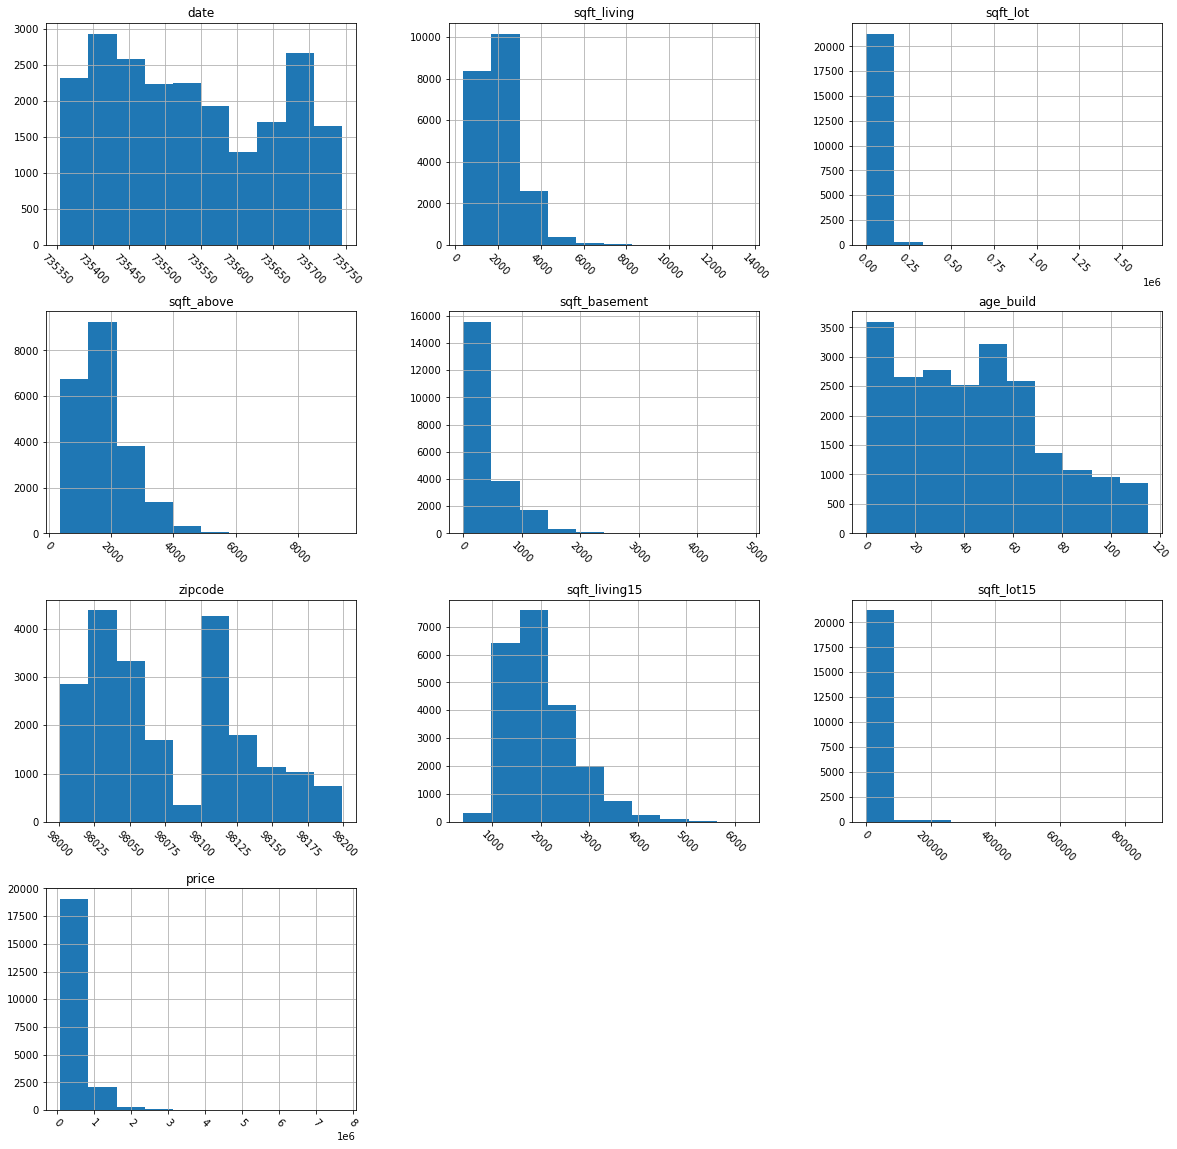

In [44]:
# Plot histogram grid
numerical.hist(figsize=(20,20), xrot=-45)
plt.show()

**Observations**:
- no Null value was detected

### Distribution of categorical variables

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/si

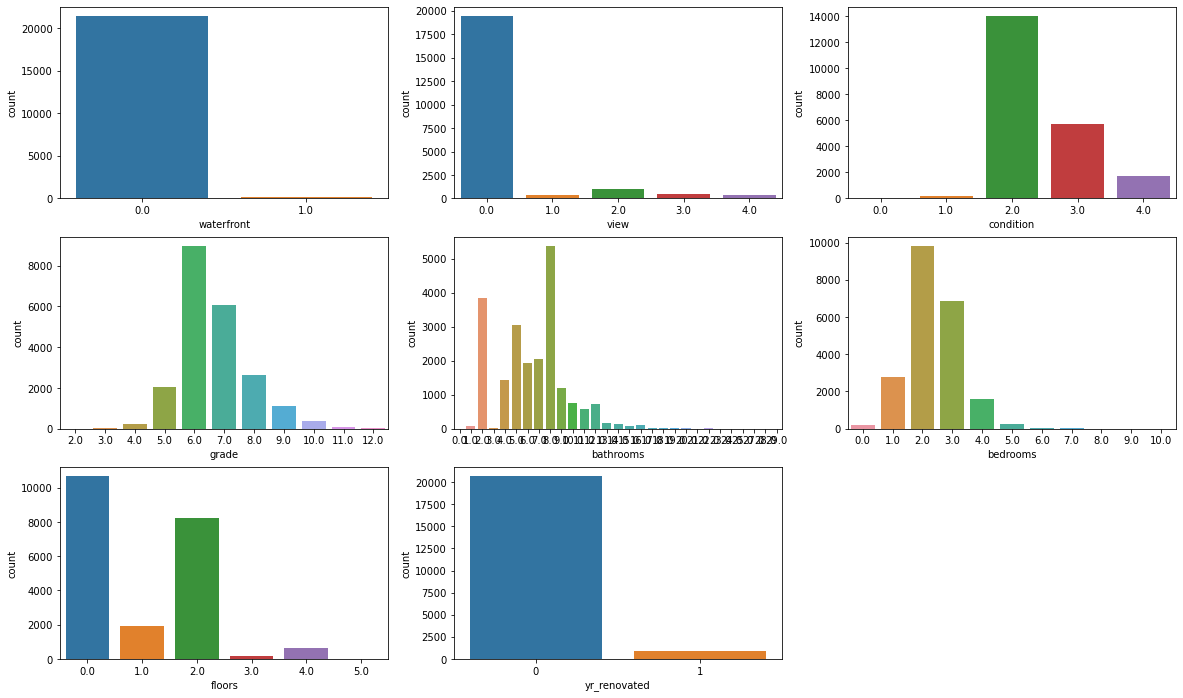

In [45]:
plt.figure(figsize=(20,12))
for i, column in enumerate(categorical,1):
    plt.subplot(3,3,i)
    sns.countplot(categorical[column])

**Observations**
- majority of properties has no view to waterfront
- majority of properties has a very low score in 'view' 
- most of properties has an average condition
- distribution of grade scoring of properties is near to normal

### Correlation of numerical variables (with price)

<AxesSubplot:>

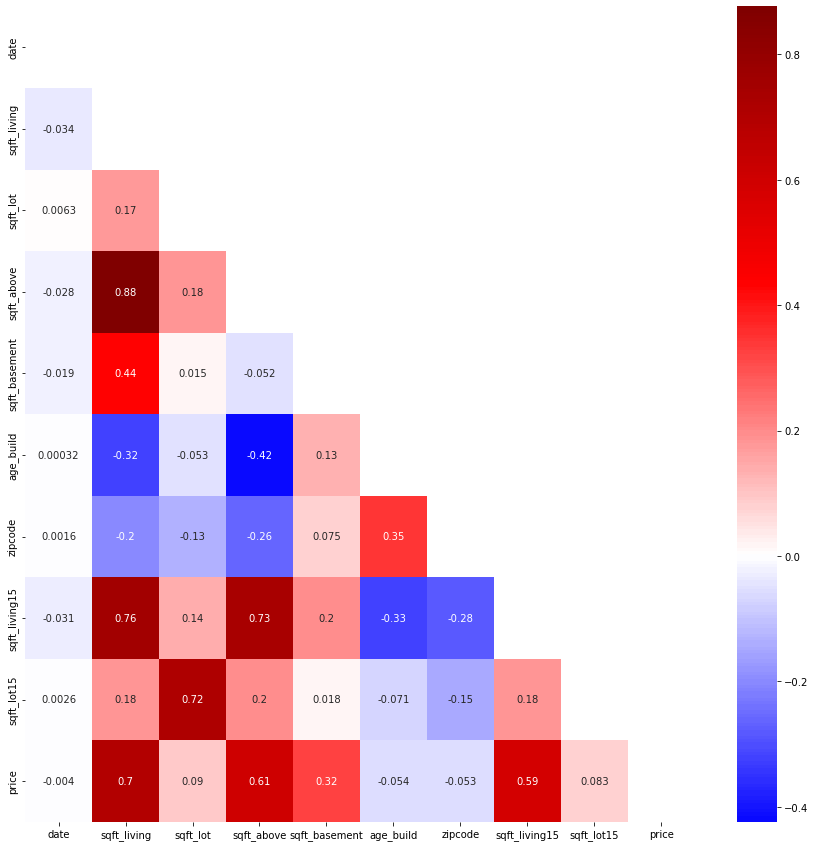

In [46]:
corr = numerical.corr()
fig, ax = plt.subplots(figsize=(15,15))
mask=np.zeros_like(numerical.corr())
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,
            cmap='seismic',
            mask=mask,
            center=0,
            annot=True,
            ax=ax)

**Observations**:
- sqft_above > 0.80
- (?) sqft_living15 and sqft_living = 0.76
- (?) sqft_lot and sqft_lot15 = 0.72

### Correlation of numerical variables (no price)

In [47]:
numerical_2 = numerical.iloc[:, :-1]
numerical_2

,date,sqft_living,sqft_lot,sqft_above,sqft_basement,age_build,zipcode,sqft_living15,sqft_lot15
0,735519,1180,5650,1180,0,60,98178,1340,5650
1,735576,2570,7242,2170,400,64,98125,1690,7639
2,735654,770,10000,770,0,82,98028,2720,8062
3,735576,1960,5000,1050,910,50,98136,1360,5000
4,735647,1680,8080,1680,0,28,98074,1800,7503
...,...,...,...,...,...,...,...,...,...
21591,735374,1530,1131,1530,0,6,98103,1530,1509
21592,735652,2310,5813,2310,0,1,98146,1830,7200
21593,735407,1020,1350,1020,0,6,98144,1020,2007
21594,735614,1600,2388,1600,0,11,98027,1410,1287


<AxesSubplot:>

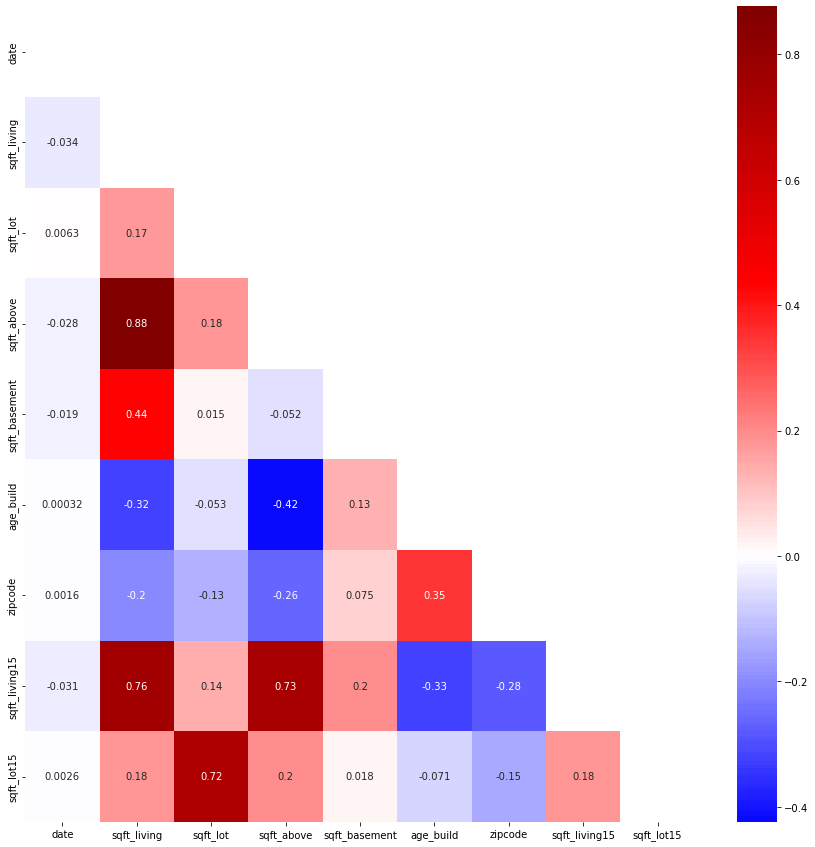

In [48]:
corr_2 = numerical_2.corr()
fig, ax = plt.subplots(figsize=(15,15))
mask = np.zeros_like(numerical_2.corr())
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_2,
            cmap='seismic',
            mask=mask,
            center=0,
            annot=True,
            ax=ax)

### Highly Correlated Columns

In [49]:
corr_matrix = numerical_2.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

['sqft_above']

### Drop the highly correlated variables  

 sqft_above and sqft_living > 0.80

In [ ]:
#numerical_2.drop(['sqft_above'],axis=1,inplace=True)

In [51]:
numerical_2

,date,sqft_living,sqft_lot,sqft_above,sqft_basement,age_build,zipcode,sqft_living15,sqft_lot15
0,735519,1180,5650,1180,0,60,98178,1340,5650
1,735576,2570,7242,2170,400,64,98125,1690,7639
2,735654,770,10000,770,0,82,98028,2720,8062
3,735576,1960,5000,1050,910,50,98136,1360,5000
4,735647,1680,8080,1680,0,28,98074,1800,7503
...,...,...,...,...,...,...,...,...,...
21591,735374,1530,1131,1530,0,6,98103,1530,1509
21592,735652,2310,5813,2310,0,1,98146,1830,7200
21593,735407,1020,1350,1020,0,6,98144,1020,2007
21594,735614,1600,2388,1600,0,11,98027,1410,1287


### Correlation of categorical variables

<AxesSubplot:xlabel='waterfront', ylabel='price'>

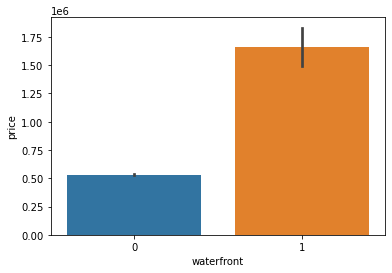

In [52]:
sns.barplot(x = df['waterfront'],y = df['price'])

<AxesSubplot:xlabel='view', ylabel='price'>

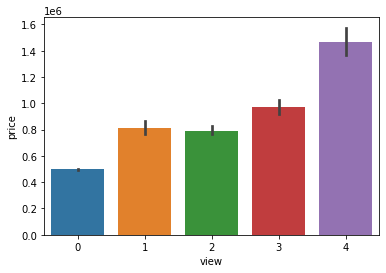

In [53]:
sns.barplot(x = df['view'],y = df['price'])

<AxesSubplot:xlabel='condition', ylabel='price'>

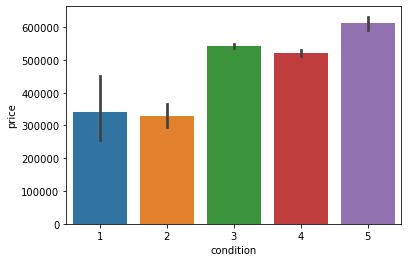

In [54]:
sns.barplot(x = df['condition'],y = df['price'])

<AxesSubplot:xlabel='grade', ylabel='price'>

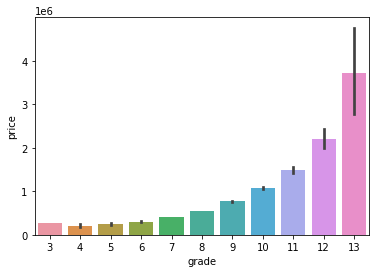

In [55]:
sns.barplot(x = df['grade'],y = df['price'])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

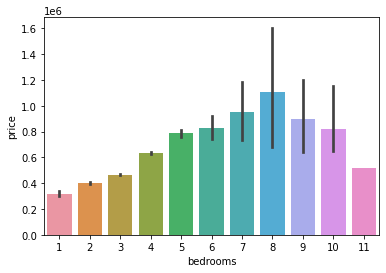

In [56]:
sns.barplot(x = df['bedrooms'],y = df['price'])

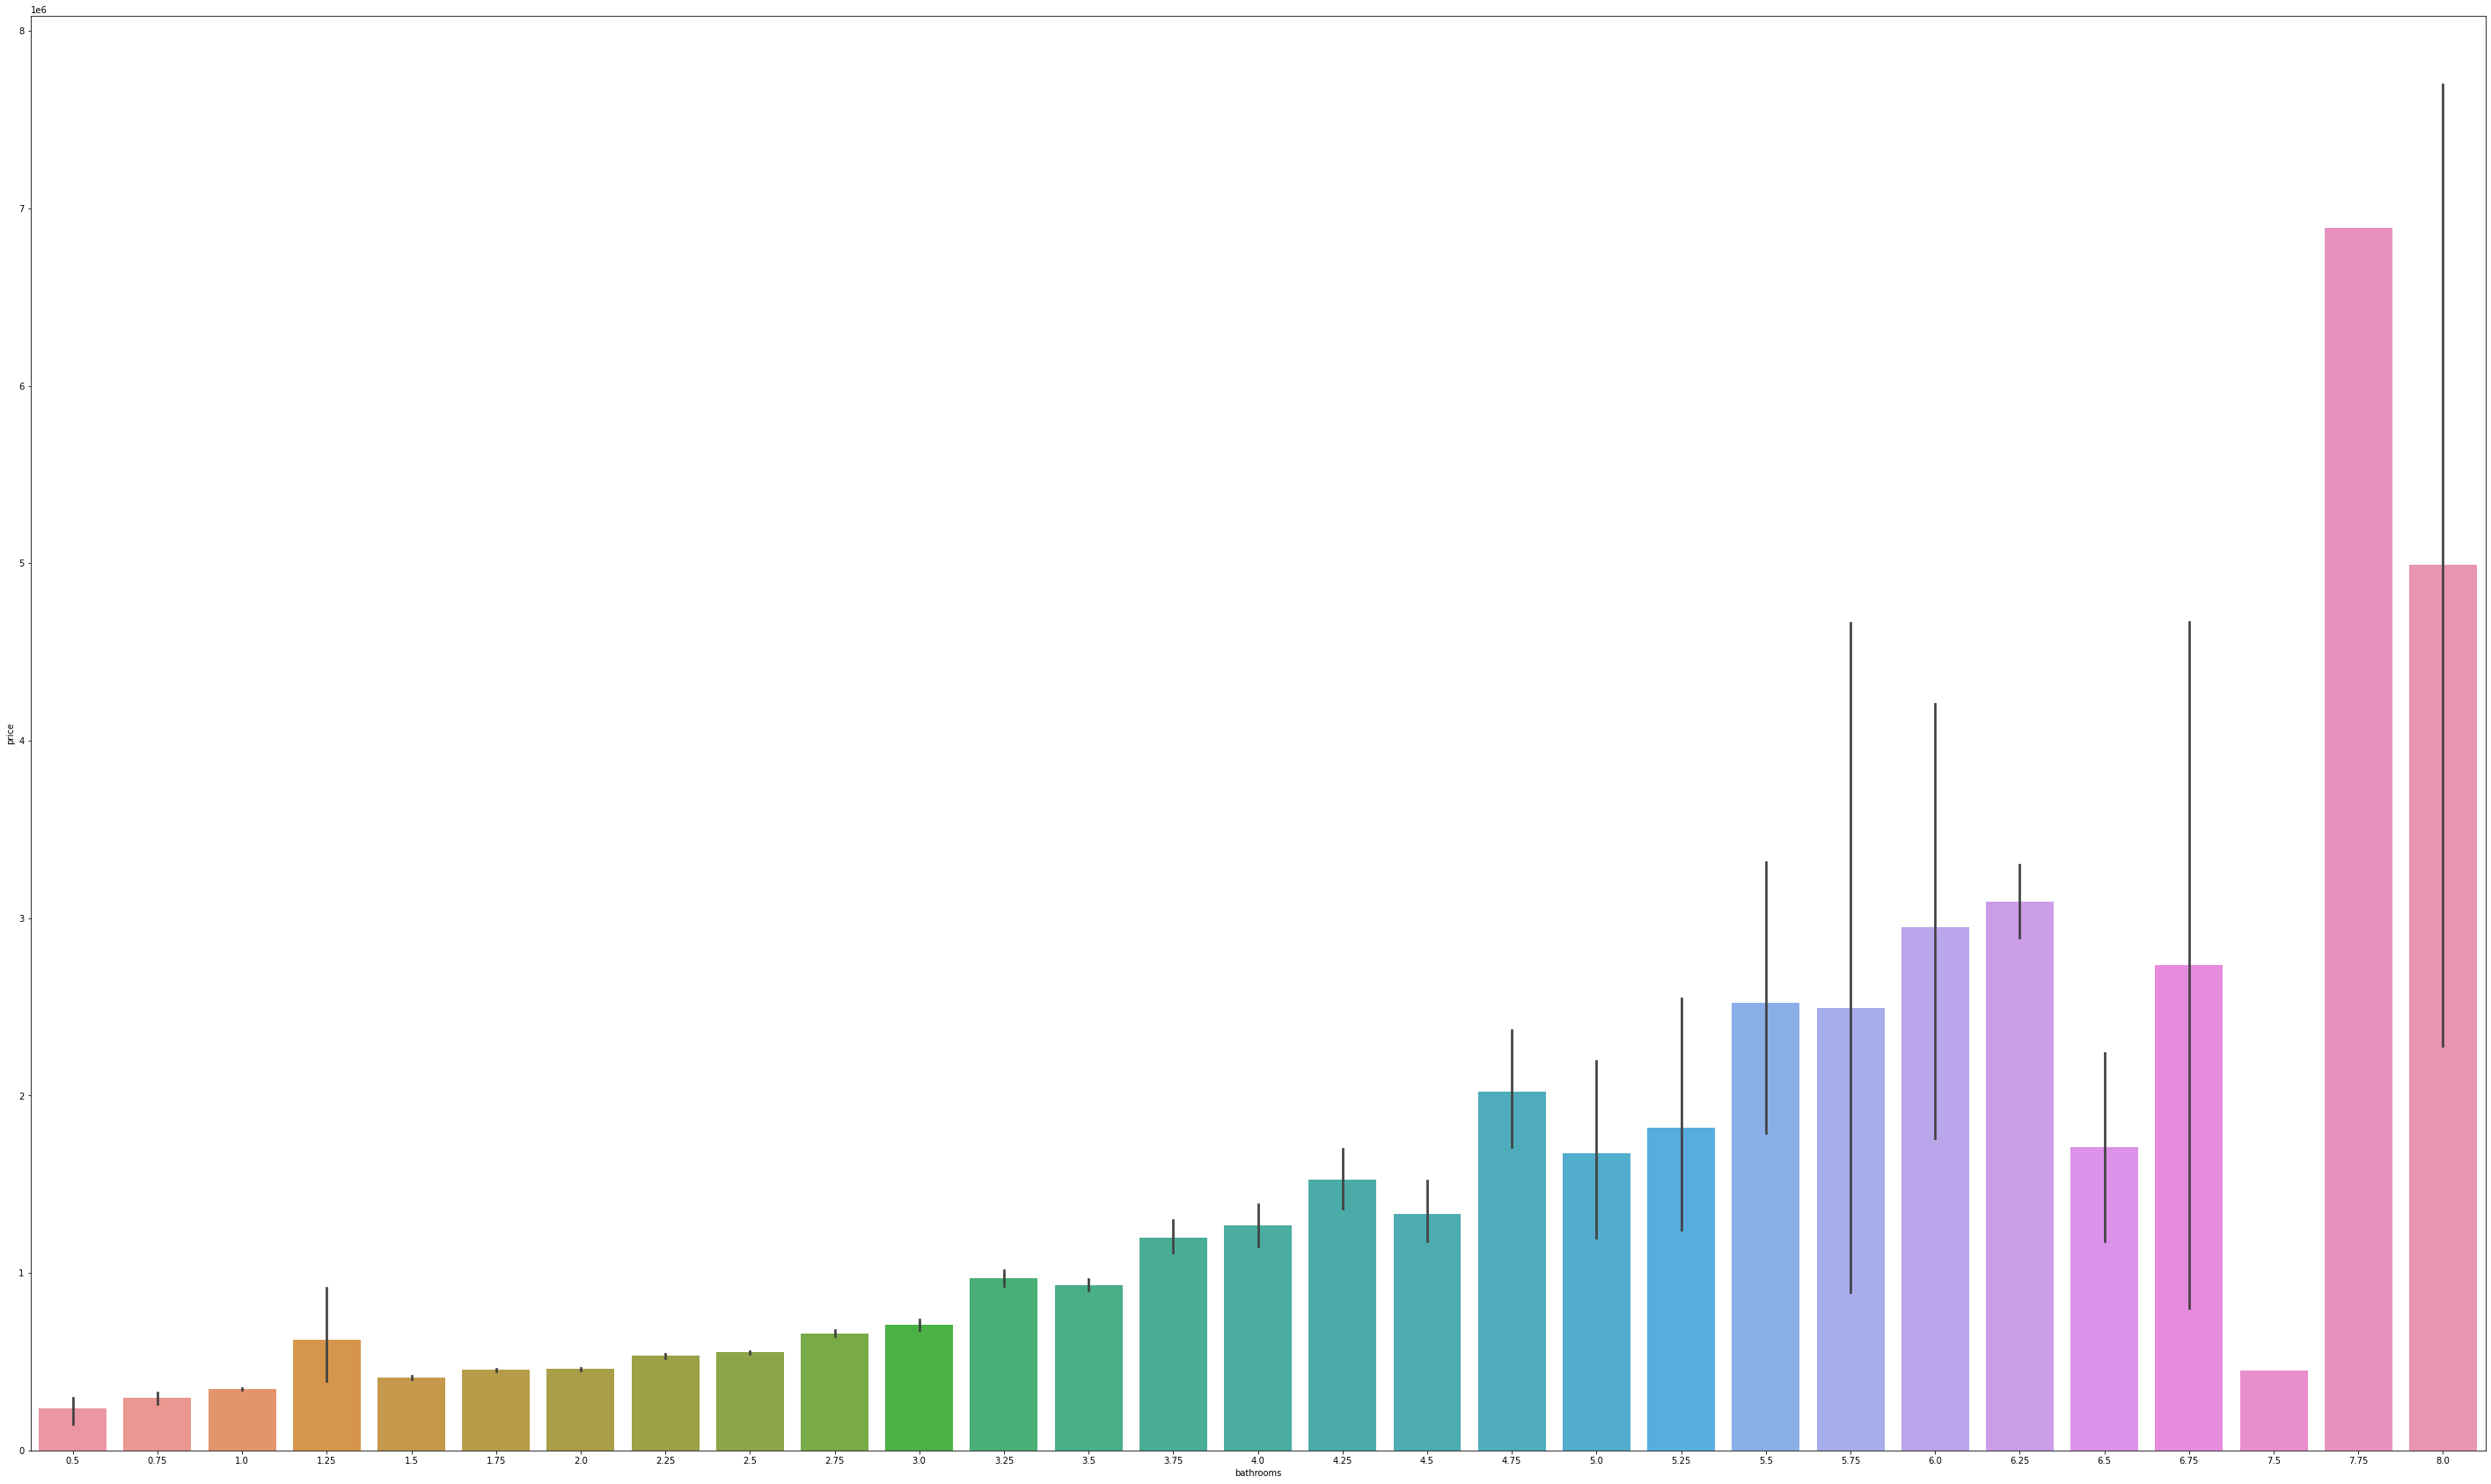

In [57]:
sns.barplot(x = df['bathrooms'],y = df['price'])
plt.gcf().set_size_inches(50,30)

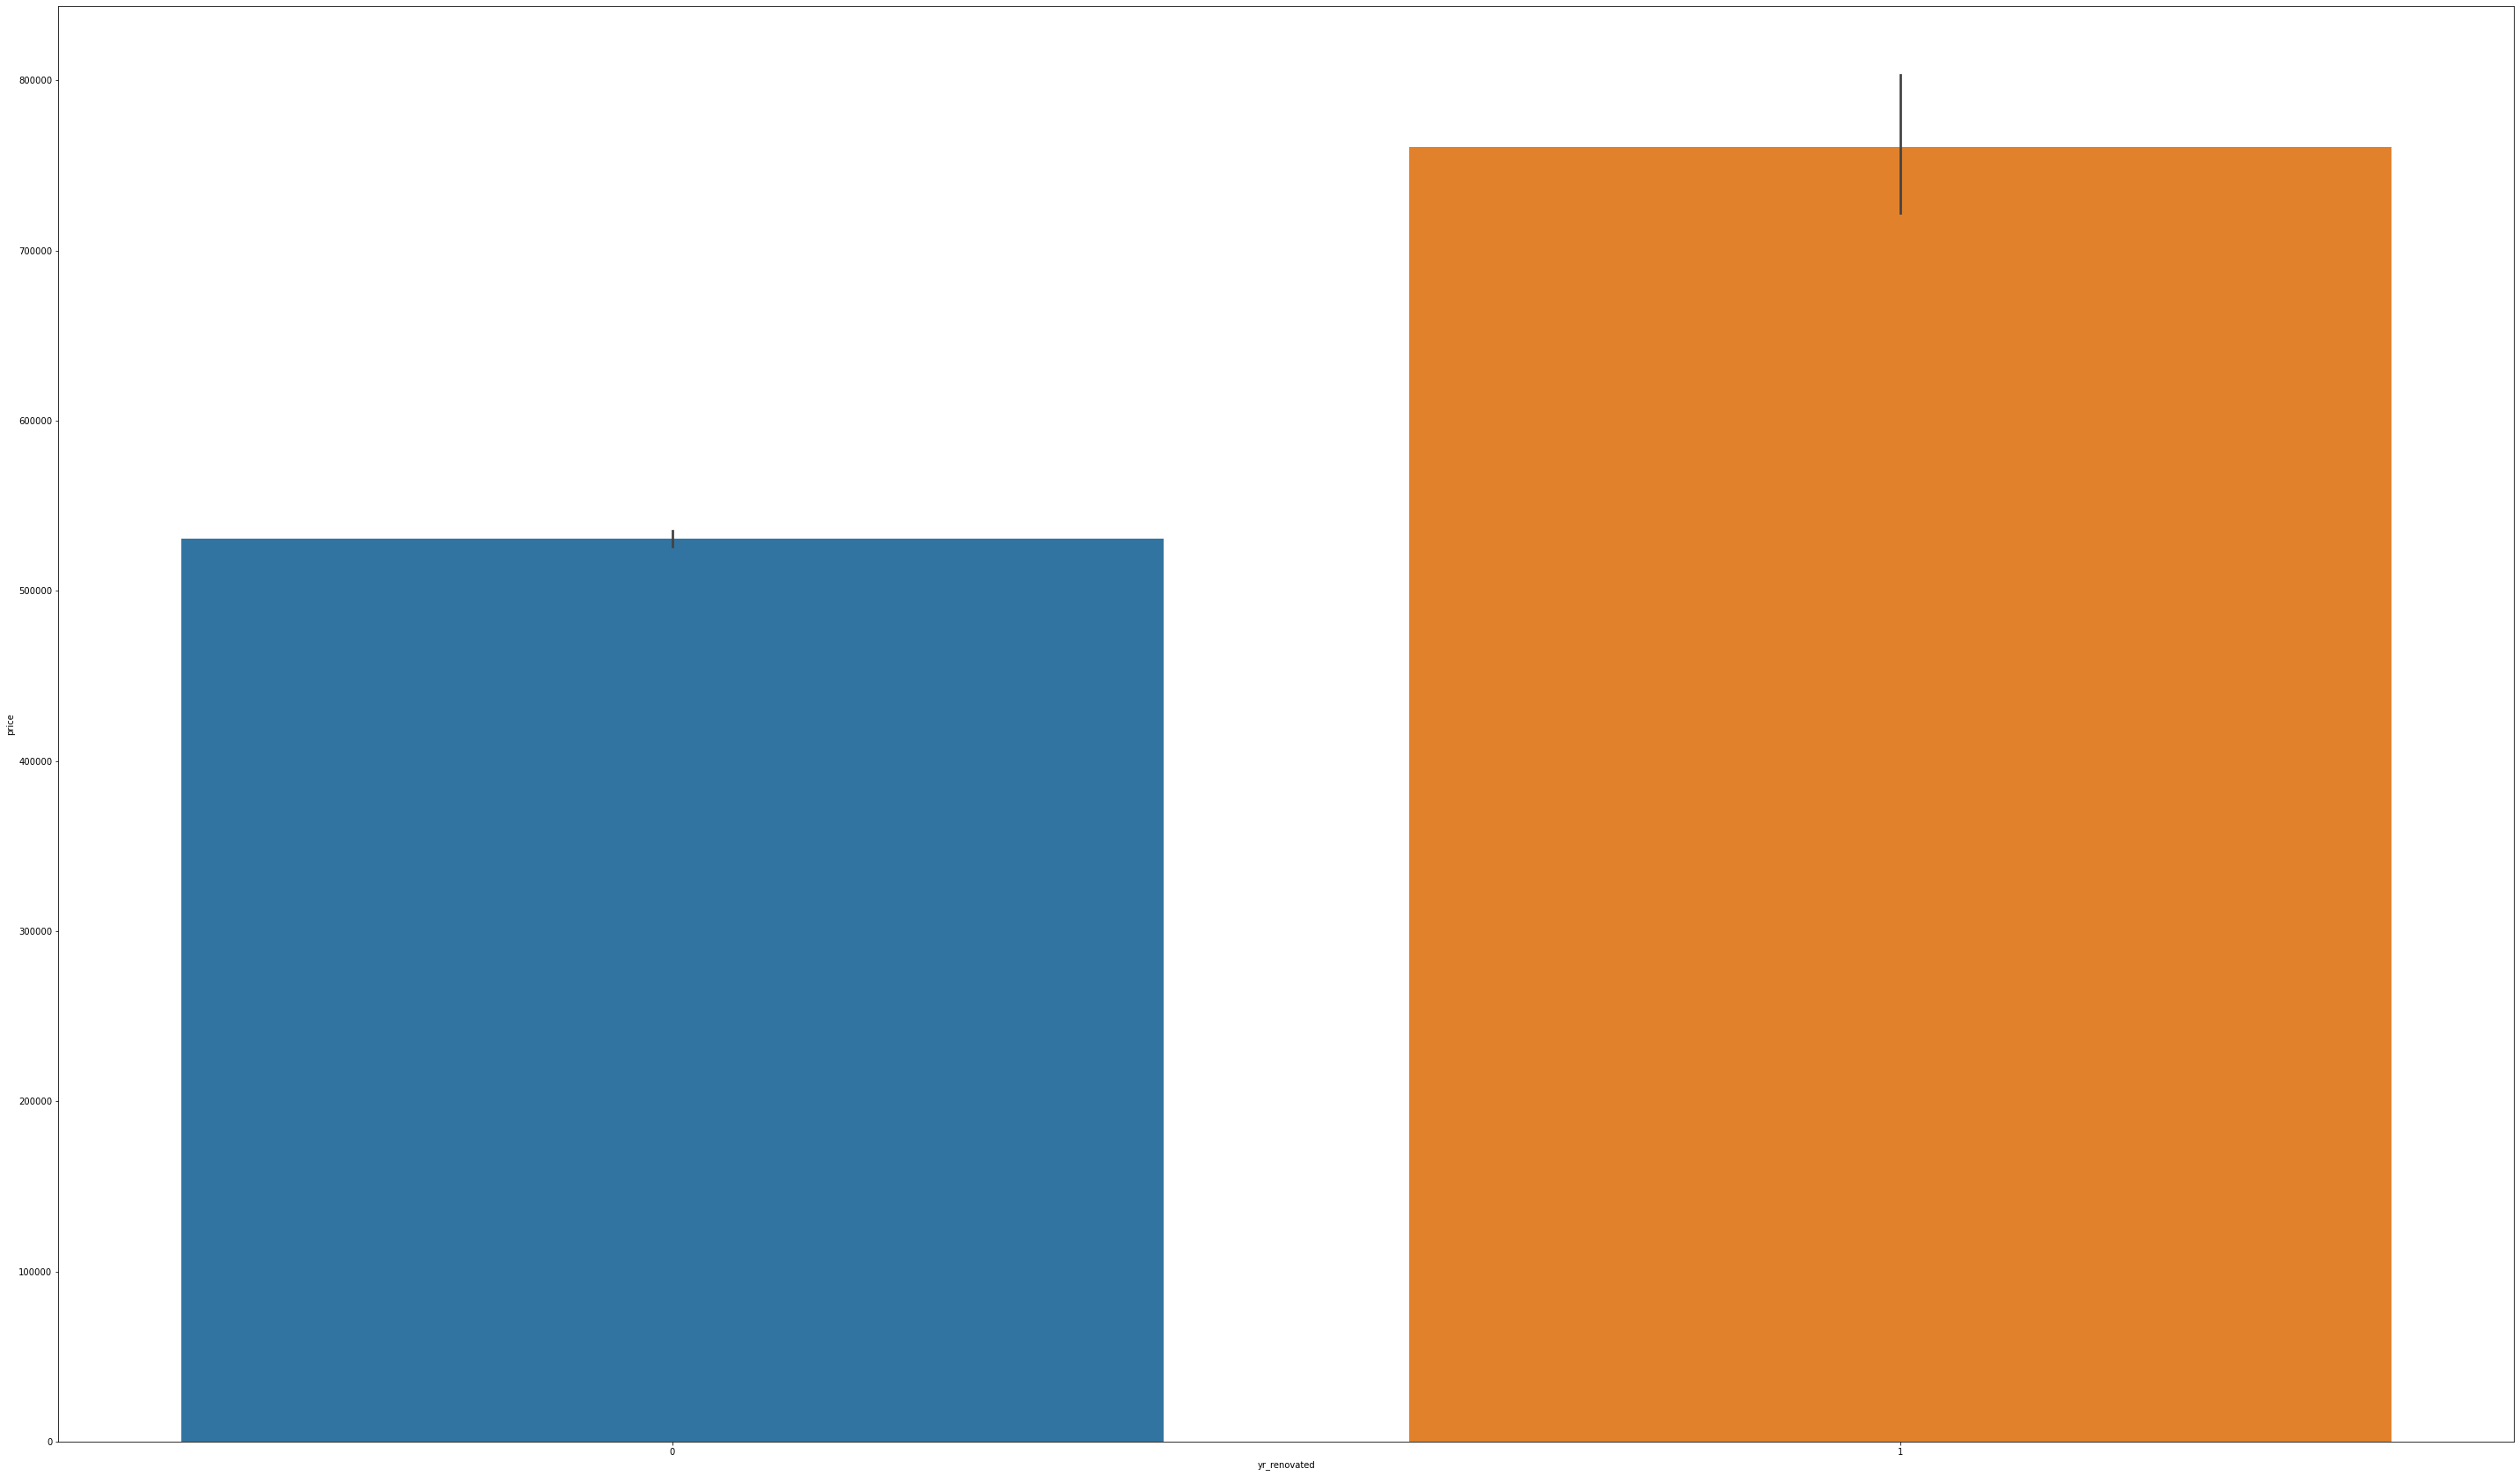

In [58]:
sns.barplot(x = df['yr_renovated'],y = df['price'])
plt.gcf().set_size_inches(50,30)

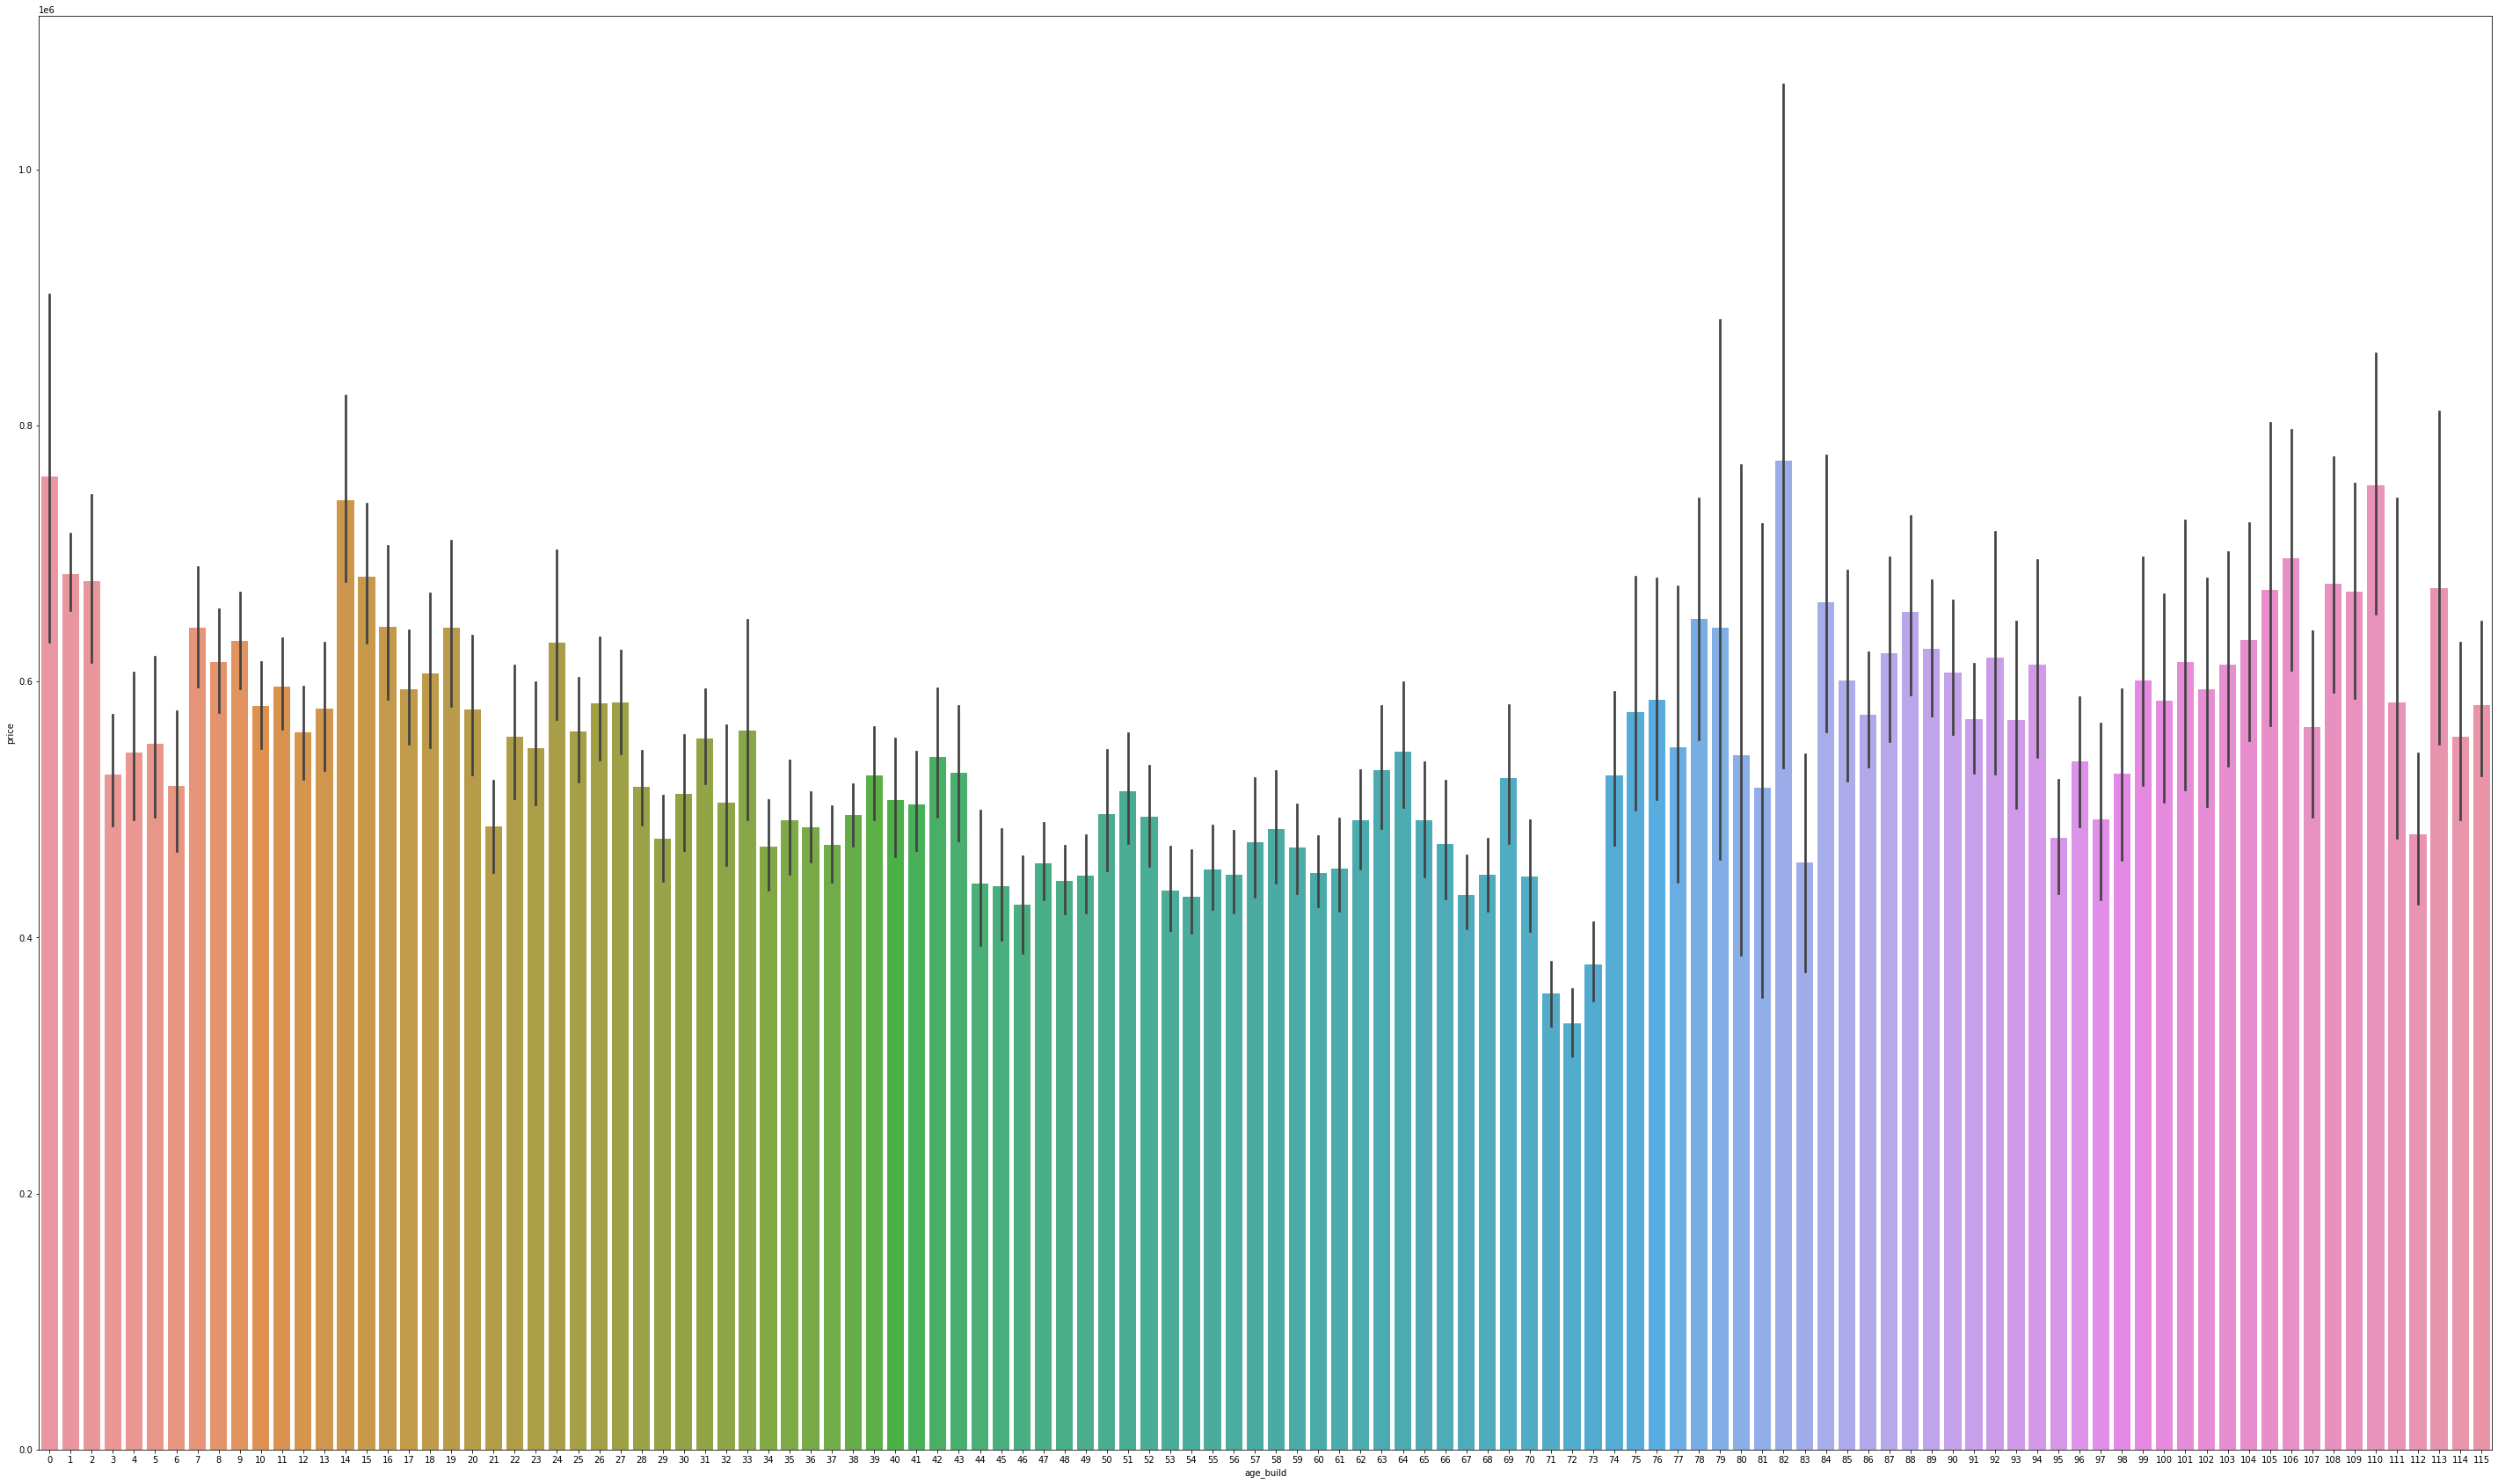

In [59]:
sns.barplot(x = df['age_build'],y = df['price'])
plt.gcf().set_size_inches(50,30)

#### Bedrooms

instead of losing data because of outliers, we set the no bedrooms >8 == 9

In [60]:
categorical['bedrooms'] = categorical['bedrooms'].replace([11,10],9)
categorical['bedrooms'].unique()

array([2., 1., 3., 4., 0., 5., 6., 7., 8., 9.])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

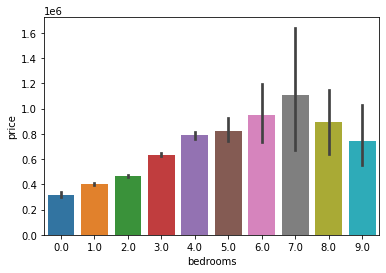

In [61]:
sns.barplot(x = categorical['bedrooms'],y = df['price'])

### Normalize numerical

sqft_living

/var/folders/mm/gw92vpys6rggjz_4z42s244w0000gn/T/ipykernel_3286/1664979473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_2['sqft_living'] = qt.fit_transform(numerical_2['sqft_living'].to_numpy().reshape(-1,1))


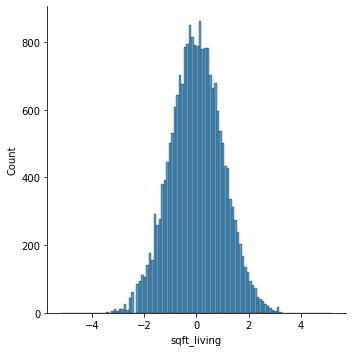

In [62]:
qt = QuantileTransformer(output_distribution = 'normal')
numerical_2['sqft_living'] = qt.fit_transform(numerical_2['sqft_living'].to_numpy().reshape(-1,1))
sns.displot(numerical_2['sqft_living'])

sqft_living15

/var/folders/mm/gw92vpys6rggjz_4z42s244w0000gn/T/ipykernel_3286/1975453770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_2['sqft_living15'] = qt.fit_transform(numerical_2['sqft_living15'].to_numpy().reshape(-1,1))


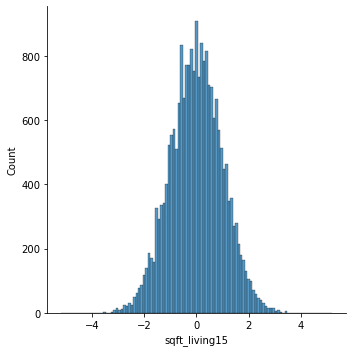

In [63]:
qt = QuantileTransformer(output_distribution = 'normal')
numerical_2['sqft_living15'] = qt.fit_transform(numerical_2['sqft_living15'].to_numpy().reshape(-1,1))
sns.displot(numerical_2['sqft_living15'])

sqft_lot

/var/folders/mm/gw92vpys6rggjz_4z42s244w0000gn/T/ipykernel_3286/2662698753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_2['sqft_lot'] = qt.fit_transform(numerical_2['sqft_lot'].to_numpy().reshape(-1,1))


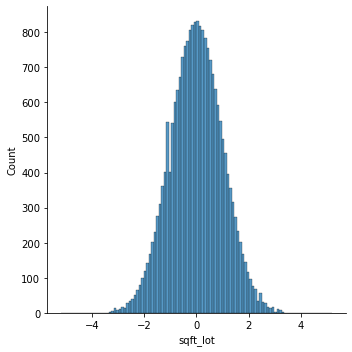

In [64]:
qt = QuantileTransformer(output_distribution = 'normal')
numerical_2['sqft_lot'] = qt.fit_transform(numerical_2['sqft_lot'].to_numpy().reshape(-1,1))
sns.displot(numerical_2['sqft_lot'])

sqft_lot15

/var/folders/mm/gw92vpys6rggjz_4z42s244w0000gn/T/ipykernel_3286/4243214181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_2['sqft_lot15'] = qt.fit_transform(numerical_2['sqft_lot15'].to_numpy().reshape(-1,1))


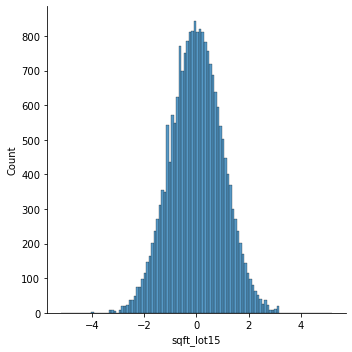

In [65]:
qt = QuantileTransformer(output_distribution = 'normal')
numerical_2['sqft_lot15'] = qt.fit_transform(numerical_2['sqft_lot15'].to_numpy().reshape(-1,1))
sns.displot(numerical_2['sqft_lot15'])

sqft_basement

/var/folders/mm/gw92vpys6rggjz_4z42s244w0000gn/T/ipykernel_3286/1424423749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_2['sqft_basement'] = qt.fit_transform(numerical_2['sqft_basement'].to_numpy().reshape(-1,1))


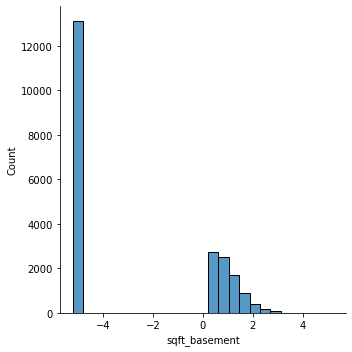

In [66]:
#qt = QuantileTransformer(output_distribution = 'normal')
#numerical_2['sqft_basement'] = qt.fit_transform(numerical_2['sqft_basement'].to_numpy().reshape(-1,1))
#sns.displot(numerical_2['sqft_basement'])

/var/folders/mm/gw92vpys6rggjz_4z42s244w0000gn/T/ipykernel_3286/244092561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_2['age_build'] = qt.fit_transform(numerical_2['age_build'].to_numpy().reshape(-1,1))


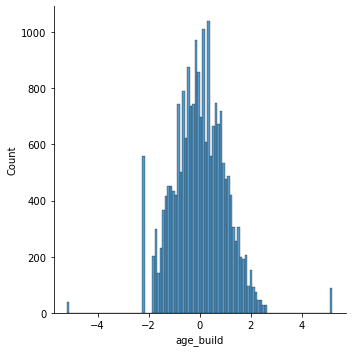

In [67]:
#qt = QuantileTransformer(output_distribution = 'normal')
#numerical_2['age_build'] = qt.fit_transform(numerical_2['age_build'].to_numpy().reshape(-1,1))
#sns.displot(numerical_2['age_build'])

In [68]:
numerical_2

,date,sqft_living,sqft_lot,sqft_above,sqft_basement,age_build,zipcode,sqft_living15,sqft_lot15
0,735519,-1.1094,-0.5178,1180,-5.1993,0.5496,98178,-1.0379,-0.5181
1,735576,0.6943,-0.1155,2170,0.4921,0.6895,98125,-0.2471,0.0075
2,735654,-2.1317,0.5628,770,-5.1993,1.1187,98028,1.0641,0.1541
3,735576,0.0515,-0.7185,1050,1.1895,0.2471,98136,-0.9856,-0.7447
4,735647,-0.2940,0.1280,1680,-5.1993,-0.3682,98074,-0.0628,-0.0404
...,...,...,...,...,...,...,...,...,...
21591,735374,-0.5092,-2.1322,1530,-5.1993,-1.5296,98103,-0.5731,-1.8316
21592,735652,0.4362,-0.4751,2310,-5.1993,-2.1831,98146,-0.0125,-0.1664
21593,735407,-1.4285,-1.8373,1020,-5.1993,-1.5296,98144,-2.0431,-1.6441
21594,735614,-0.4061,-1.5155,1600,-5.1993,-1.0083,98027,-0.8625,-2.0680


## Trial 1: only numerical varaibles

#### XY Split

In [69]:
X=numerical_2
X
y=numerical.price
y

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21591    360000
21592    400000
21593    402101
21594    400000
21595    325000
Name: price, Length: 21596, dtype: int64

In [70]:
X

,date,sqft_living,sqft_lot,sqft_above,sqft_basement,age_build,zipcode,sqft_living15,sqft_lot15
0,735519,-1.1094,-0.5178,1180,-5.1993,0.5496,98178,-1.0379,-0.5181
1,735576,0.6943,-0.1155,2170,0.4921,0.6895,98125,-0.2471,0.0075
2,735654,-2.1317,0.5628,770,-5.1993,1.1187,98028,1.0641,0.1541
3,735576,0.0515,-0.7185,1050,1.1895,0.2471,98136,-0.9856,-0.7447
4,735647,-0.2940,0.1280,1680,-5.1993,-0.3682,98074,-0.0628,-0.0404
...,...,...,...,...,...,...,...,...,...
21591,735374,-0.5092,-2.1322,1530,-5.1993,-1.5296,98103,-0.5731,-1.8316
21592,735652,0.4362,-0.4751,2310,-5.1993,-2.1831,98146,-0.0125,-0.1664
21593,735407,-1.4285,-1.8373,1020,-5.1993,-1.5296,98144,-2.0431,-1.6441
21594,735614,-0.4061,-1.5155,1600,-5.1993,-1.0083,98027,-0.8625,-2.0680


In [71]:
# X=X._get_numeric_data()
# X

#### Data Splitting

In [72]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

#### Standardize

In [73]:
std_scaler = StandardScaler().fit(X_train) 

X_train_scaled = std_scaler.transform(X_train)

In [74]:
X_test_scaled=std_scaler.transform(X_test)

In [75]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.49324435 -0.71707153  0.41865299 ...  0.52695717 -0.41855798
   0.27814248]
 [-0.01627548  0.54640315  0.37730395 ... -1.39808504 -0.88431417
  -0.16690314]
 [-1.42951657  0.1867116   0.81873396 ... -0.07111419  0.37987618
   0.9915377 ]
 ...
 [-0.00744272 -0.16726225 -0.08728358 ... -0.74394448 -0.6149564
   0.0020762 ]
 [-1.06737354  0.00642335  0.49158368 ... -0.8747726  -0.64090562
   0.51783934]
 [ 0.18687793 -0.82856292 -1.80782357 ...  0.71385448 -0.45577345
  -0.81851476]]
--------
[[ 0.30170376  0.71975034  0.3302575  ... -0.37014988  0.88311427
   0.34810092]
 [ 1.60011902 -0.58388885 -1.82944958 ...  1.08764908 -0.52357866
  -1.96006164]
 [ 0.01022279 -0.50968445 -2.37422485 ...  0.47088798 -0.57161943
  -2.07731091]
 ...
 [-0.36958575 -1.4278584   0.08286582 ...  0.52695717 -2.11501665
  -0.18381468]
 [-1.42068381 -0.21703882 -0.09885053 ...  1.68572045 -0.16316295
  -0.01723105]
 [-0.06927202  1.42220091 -0.30117319 ...  1.08764908 -0.14795428
  -0.29942452]]


In [76]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     1916.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:30:31   Log-Likelihood:            -2.0931e+05
No. Observations:               15117   AIC:                         4.186e+05
Df Residuals:                   15107   BIC:                         4.187e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.391e+05   2029.739    265.599      0.0

#### Model validation

In [77]:
#using sklearn
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [78]:
model.coef_ #gives you per column the slope (alpha)

array([   6912.88852255, -122641.86695535,  -32198.79712324,
        348768.89526896,  159369.97766797,   74733.36855853,
          3113.97960287,   69145.65777134,  -10215.86400441])

In [79]:
model.intercept_ #gives the optimal slope

539096.328041276

In [80]:
R2_test = model.score(X_test_scaled,y_test) # measure R2
R2_test

0.544135603642514

In [81]:
# Making prediction
y_pred = model.predict(X_test_scaled)
y_pred

array([674033.24575562, 505750.86573498, 603575.11856333, ...,
       174540.49376766, 444264.24734495, 819051.46339383])

In [82]:
y_test

14863     392000
2277      418000
21578     520000
18669    1050000
21453     249000
          ...   
12811     291970
12288     741000
6556      269000
16310     180000
1050      850000
Name: price, Length: 6479, dtype: int64

In [83]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

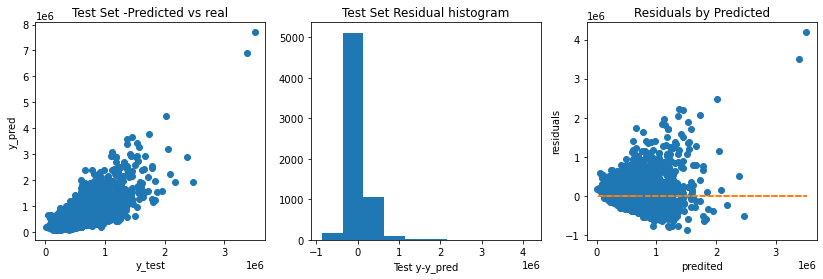

In [84]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

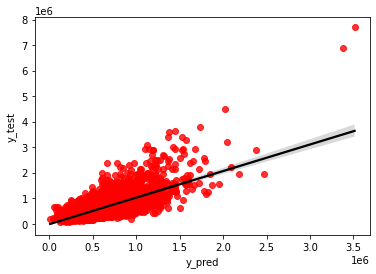

In [85]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

#### Error metrics

In [86]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

63313324002.27866
161305.87288212223


#### Features Importance

In [87]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
3,sqft_above,348768.8953
4,sqft_basement,159369.9777
1,sqft_living,122641.8670
5,age_build,74733.3686
7,sqft_living15,69145.6578
2,sqft_lot,32198.7971
8,sqft_lot15,10215.8640
0,date,6912.8885
6,zipcode,3113.9796


we can notice that the sqft_living and living 15 are the most relevant together with zipcode

In [88]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_build,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,735519,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,60,0,98178,1340,5650,221900
1,735576,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,64,1,98125,1690,7639,538000
2,735654,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,82,0,98028,2720,8062,180000
3,735576,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,50,0,98136,1360,5000,604000
4,735647,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,28,0,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,735374,3,2.5000,1530,1131,3.0000,0,0,3,8,1530,0,6,0,98103,1530,1509,360000
21592,735652,4,2.5000,2310,5813,2.0000,0,0,3,8,2310,0,1,0,98146,1830,7200,400000
21593,735407,2,0.7500,1020,1350,2.0000,0,0,3,7,1020,0,6,0,98144,1020,2007,402101
21594,735614,3,2.5000,1600,2388,2.0000,0,0,3,8,1600,0,11,0,98027,1410,1287,400000


## Trial 2: Numerical and categorical (with transformed zipcode) 

### Transform zipcode

In [89]:
price_zip_mean = df.groupby(['zipcode'])['price'].mean()
price_zip_mean.sort_values(ascending=False)

zipcode
98039   2161300.0000
98004   1356523.9905
98040   1194873.6383
98112   1096239.0074
98102    899607.6731
            ...     
98148    284908.5965
98001    281194.8698
98032    251296.2400
98168    240328.3717
98002    234284.0352
Name: price, Length: 70, dtype: float64

In [90]:
price_zip = df.groupby(['zipcode'])['price'].mean()
pz = price_zip.sort_values(ascending=False).reset_index()
pz

,zipcode,price
0,98039,2161300.0000
1,98004,1356523.9905
2,98040,1194873.6383
3,98112,1096239.0074
4,98102,899607.6731
...,...,...
65,98148,284908.5965
66,98001,281194.8698
67,98032,251296.2400
68,98168,240328.3717


In [91]:
Q1 = np.percentile(pz['price'], 25)
Q2 = np.percentile(pz['price'], 50)
Q3 = np.percentile(pz['price'], 75)
Q4 = np.percentile(pz['price'], 100)

In [92]:
pz['quantile_zip'] = "1"
pz['quantile_zip'] = np.where(pz['price'] >= Q1, "2", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q2, "3", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q3, "4", pz['quantile_zip'])

In [93]:
df = pd.merge(df, pz[['zipcode', 'quantile_zip']], on='zipcode', how='left', sort=False)b

In [113]:
df["sqft_basement"] = np.where (df["sqft_basement"] != 0, 1, df["sqft_basement"])
df.sqft_basement.value_counts()

0    13110
1     8486
Name: sqft_basement, dtype: int64

In [114]:
df.drop(['zipcode'], axis=1, inplace=True)

In [115]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_build,yr_renovated,sqft_living15,sqft_lot15,price,quantile_zip
0,735519,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,60,0,1340,5650,-1.5247,1
1,735407,2,1.0000,880,6780,1.0000,0,0,4,6,880,0,70,0,1190,6780,-1.7118,1
2,735431,3,2.2500,2100,8201,1.0000,0,2,3,8,1620,1,48,0,2660,8712,-0.0314,1
3,735501,3,1.0000,1300,5898,1.0000,0,0,3,7,1300,0,54,0,1320,7619,-1.3717,1
4,735656,2,1.0000,860,5265,1.0000,0,0,3,6,860,0,84,0,1650,8775,-2.1197,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,735509,4,3.2500,3990,18115,2.0000,0,0,4,11,3990,0,26,0,3450,16087,2.6939,4
21592,735439,4,3.5000,4065,18713,2.0000,0,0,4,10,4065,0,28,0,3070,18713,2.3139,4
21593,735709,5,5.2500,3410,8118,2.0000,0,0,3,11,3410,0,9,0,3410,16236,2.4569,4
21594,735550,5,4.0000,5190,14600,2.0000,0,1,3,11,5190,0,2,0,3840,19250,2.7583,4


### Normalize 

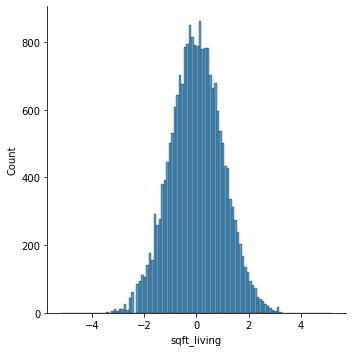

In [116]:
qt = QuantileTransformer(output_distribution = 'normal')
df['sqft_living'] = qt.fit_transform(df['sqft_living'].to_numpy().reshape(-1,1))
sns.displot(df['sqft_living'])

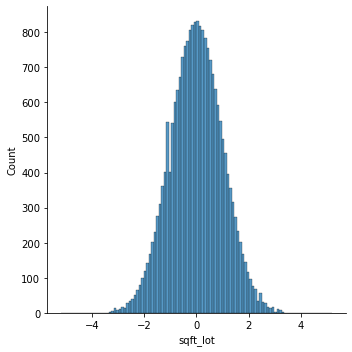

In [117]:
qt = QuantileTransformer(output_distribution = 'normal')
df['sqft_lot'] = qt.fit_transform(df['sqft_lot'].to_numpy().reshape(-1,1))
sns.displot(df['sqft_lot'])

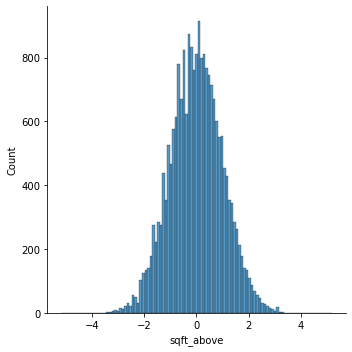

In [118]:
qt = QuantileTransformer(output_distribution = 'normal')
df['sqft_above'] = qt.fit_transform(df['sqft_above'].to_numpy().reshape(-1,1))
sns.displot(df['sqft_above'])

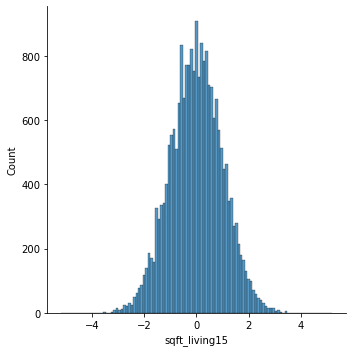

In [119]:
qt = QuantileTransformer(output_distribution = 'normal')
df['sqft_living15'] = qt.fit_transform(df['sqft_living15'].to_numpy().reshape(-1,1))
sns.displot(df['sqft_living15'])

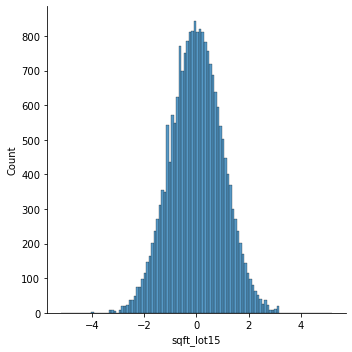

In [120]:
qt = QuantileTransformer(output_distribution = 'normal')
df['sqft_lot15'] = qt.fit_transform(df['sqft_lot15'].to_numpy().reshape(-1,1))
sns.displot(df['sqft_lot15'])

In [121]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_build,yr_renovated,sqft_living15,sqft_lot15,price,quantile_zip
0,735519,3,1.0000,-1.1094,-0.5178,1.0000,0,0,3,7,-0.7039,0,60,0,-1.0379,-0.5181,-1.5247,1
1,735407,2,1.0000,-1.7924,-0.2444,1.0000,0,0,4,6,-1.5377,0,70,0,-1.4828,-0.2473,-1.7118,1
2,735431,3,2.2500,0.2136,0.1678,1.0000,0,2,3,8,0.0791,1,48,0,1.0104,0.3575,-0.0314,1
3,735501,3,1.0000,-0.8827,-0.4625,1.0000,0,0,3,7,-0.4376,0,54,0,-1.0887,-0.0038,-1.3717,1
4,735656,2,1.0000,-1.8448,-0.6017,1.0000,0,0,3,6,-1.6068,0,84,0,-0.3229,0.3709,-2.1197,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,735509,4,3.2500,1.7862,1.1815,2.0000,0,0,4,11,2.0661,0,26,0,1.7739,1.2220,2.6939,4
21592,735439,4,3.5000,1.8356,1.2024,2.0000,0,0,4,10,2.1167,0,28,0,1.4250,1.3089,2.3139,4
21593,735709,5,5.2500,1.3978,0.1441,2.0000,0,0,3,11,1.6591,0,9,0,1.7387,1.2284,2.4569,4
21594,735550,5,4.0000,2.4086,1.0135,2.0000,0,1,3,11,2.7449,0,2,0,2.1118,1.3220,2.7583,4


### x/y Splitting

In [124]:
X2=df.drop('price', axis=1)
X2
y2=df.price
y2

0       -1.5247
1       -1.7118
2       -0.0314
3       -1.3717
4       -2.1197
          ...  
21591    2.6939
21592    2.3139
21593    2.4569
21594    2.7583
21595    2.2504
Name: price, Length: 21596, dtype: float64

In [125]:
X2 

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_build,yr_renovated,sqft_living15,sqft_lot15,quantile_zip
0,735519,3,1.0000,-1.1094,-0.5178,1.0000,0,0,3,7,-0.7039,0,60,0,-1.0379,-0.5181,1
1,735407,2,1.0000,-1.7924,-0.2444,1.0000,0,0,4,6,-1.5377,0,70,0,-1.4828,-0.2473,1
2,735431,3,2.2500,0.2136,0.1678,1.0000,0,2,3,8,0.0791,1,48,0,1.0104,0.3575,1
3,735501,3,1.0000,-0.8827,-0.4625,1.0000,0,0,3,7,-0.4376,0,54,0,-1.0887,-0.0038,1
4,735656,2,1.0000,-1.8448,-0.6017,1.0000,0,0,3,6,-1.6068,0,84,0,-0.3229,0.3709,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,735509,4,3.2500,1.7862,1.1815,2.0000,0,0,4,11,2.0661,0,26,0,1.7739,1.2220,4
21592,735439,4,3.5000,1.8356,1.2024,2.0000,0,0,4,10,2.1167,0,28,0,1.4250,1.3089,4
21593,735709,5,5.2500,1.3978,0.1441,2.0000,0,0,3,11,1.6591,0,9,0,1.7387,1.2284,4
21594,735550,5,4.0000,2.4086,1.0135,2.0000,0,1,3,11,2.7449,0,2,0,2.1118,1.3220,4


In [126]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=.30,random_state=123)

In [127]:
y_train2

11950    0.4402
17781   -0.0314
3405    -1.2286
740     -0.0872
848      0.5467
          ...  
7763     0.9775
15377    0.0506
17730    0.1957
15725   -1.1676
19966    0.2047
Name: price, Length: 15117, dtype: float64

### Standardize

In [128]:
std_scaler2 = StandardScaler().fit(X_train2) 

X_train_scaled2 = std_scaler2.transform(X_train2)

In [129]:
X_test_scaled2 = std_scaler2.transform(X_test2)

### Running Linear Regression

In [130]:
X_train_const_scaled2 = sm.add_constant(X_train_scaled2) # adding a constant

model2 = sm.OLS(y_train2, X_train_const_scaled2).fit()
predictions_train2 = model2.predict(X_train_const_scaled2) 

X_test_const_scaled2 = sm.add_constant(X_test_scaled2) # adding a constant
predictions_test2 = model2.predict(X_test_const_scaled2) 
print_model2 = model2.summary()
print(print_model2)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     3895.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:45:57   Log-Likelihood:                -8709.7
No. Observations:               15117   AIC:                         1.746e+04
Df Residuals:                   15099   BIC:                         1.759e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0085      0.004     -2.439      0.0

In [131]:
#using sklearn
model2=LinearRegression()    # model
model2.fit(X_train_scaled2, y_train2)   # model train

LinearRegression()

In [132]:
model2.coef_

array([ 0.04329889, -0.03912981,  0.06714431,  0.28937324,  0.0238754 ,
        0.03753744,  0.0545729 ,  0.07844919,  0.04745917,  0.26211768,
        0.02607608,  0.0299959 ,  0.16557037,  0.01526354,  0.06711665,
       -0.07398153,  0.47048432])

In [133]:
features_importances2 = pd.DataFrame(data={
    'Attribute': X_train2.columns,
    'Importance': abs(model2.coef_)
})
features_importances2 = features_importances2.sort_values(by='Importance', ascending=False)
features_importances2

,Attribute,Importance
16,quantile_zip,0.4705
3,sqft_living,0.2894
9,grade,0.2621
12,age_build,0.1656
7,view,0.0784
15,sqft_lot15,0.0740
2,bathrooms,0.0671
14,sqft_living15,0.0671
6,waterfront,0.0546
8,condition,0.0475


In [134]:
#using sklearn
model2=LinearRegression()    # model
model2.fit(X_train_scaled2, y_train2)   # model train

LinearRegression()

In [135]:
R2_test2 = model2.score(X_test_scaled2,y_test2) # measure R2
R2_test2

0.8135770287967135

In [136]:
# Making prediction
y_pred = model.predict(X_test_scaled)
y_pred

array([674033.24575562, 505750.86573498, 603575.11856333, ...,
       174540.49376766, 444264.24734495, 819051.46339383])

In [137]:
y_test


14863     392000
2277      418000
21578     520000
18669    1050000
21453     249000
          ...   
12811     291970
12288     741000
6556      269000
16310     180000
1050      850000
Name: price, Length: 6479, dtype: int64

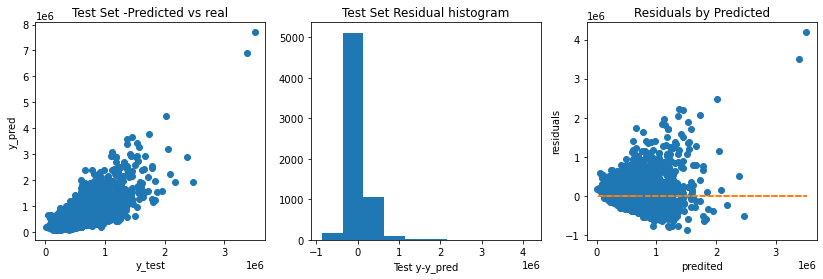

In [138]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

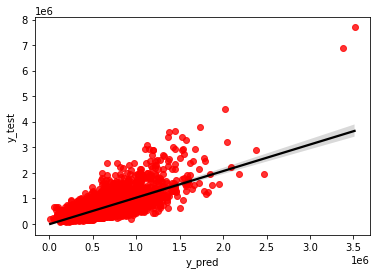

In [139]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})